### Prediction Using Supervised ML

## Anshul Sinha

### Linear Regression : Linear Regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#Looking for null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Scatterplot')

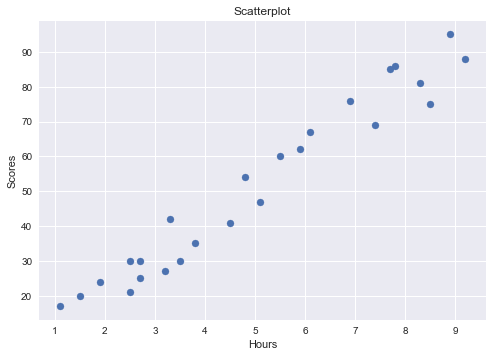

In [5]:
#Visualize our features 
plt.style.use('seaborn')
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatterplot')



#### We can use Linear Regression for this data later.



# Data Preparation

In [6]:
X=data['Hours']
y=data['Scores']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_pred=model.predict(X_test.values.reshape(-1,1))

In [9]:
accuracy=model.score(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1))
print("Accuracy : ",(accuracy*100).round(2),"%")

Accuracy :  94.55 %


In [10]:
#Let's evaluate our performance
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('RMSE Value is ',np.sqrt(mse))

RMSE Value is  4.6474476121003665


### Take a look at predicted values and actual values

In [11]:
new_data=pd.concat([pd.Series(np.ndarray.flatten(y_pred.round(2))),pd.Series(y_test.values)],axis=1)
new_data.columns=['Predicted','Actual']
new_data

,Predicted,Actual
0,16.88,20
1,33.73,27
2,75.36,69
3,26.79,30
4,60.49,62


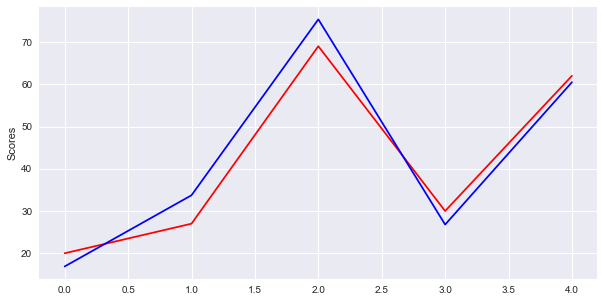

In [12]:
plt.rcParams['figure.figsize']=(10,5)
plt.ylabel('Scores')
plt.plot(new_data['Actual'],color='r')
plt.plot(new_data['Predicted'],color='b')
#This almost matches !!


# Let's check 

In [13]:
value=np.array(9.25)
prediction=model.predict(value.reshape(-1,1))
print('The score for the student will be {} marks provided that he studies 9.25 hrs/day.'
      .format(prediction.flatten()[0].round(2)))

The score for the student will be 93.69 marks provided that he studies 9.25 hrs/day.
